# Machine Learning Engineer Nanodegree
## Unsupervised Learning
# Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Project Overview
In this project you will apply unsupervised learning techniques on product spending data collected for customers of a wholesale distributor in Lisbon, Portugal **to identify customer segments hidden in the data**. You will first explore the data by selecting a small subset to sample and determine if any product categories highly correlate with one another. Afterwards, you will preprocess the data by scaling each product category and then identifying (and removing) unwanted outliers. With the good, clean customer spending data, you will apply PCA transformations to the data and implement clustering algorithms to segment the transformed customer data. Finally, you will compare the segmentation found with an additional labeling and consider ways this information could assist the wholesale distributor with future service changes.

## Project Highlights
This project is designed to give you a hands-on experience with unsupervised learning and work towards developing conclusions for a potential client on a real-world dataset. Many companies today collect vast amounts of data on customers and clientele, and have a strong desire to understand the meaningful relationships hidden in their customer base. Being equipped with this information can assist a company engineer future products and services that best satisfy the demands or needs of their customers.

**Things you will learn by completing this project:**

- **How to apply preprocessing techniques such as feature scaling and outlier detection.**
- **How to interpret data points that have been scaled, transformed, or reduced from PCA.** 
- **How to analyze PCA dimensions and construct a new feature space.**
- **How to optimally cluster a set of data to find hidden patterns in a dataset.**
- **How to assess information given by cluster data and use it in a meaningful way.**

## Description
A wholesale distributor recently tested a change to their delivery method for some customers, by moving from a morning delivery service five days a week to a cheaper evening delivery service three days a week. Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries, losing the distributor more money than what was being saved. You've been hired by the wholesale distributor to find what types of customers they have to help them make better, more informed business decisions in the future. Your task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.

## Software and Libraries
This project uses the following software and Python libraries:

- [Python 2.7](https://www.python.org/download/releases/2.7/)
- [NumPy](http://www.numpy.org/)
- [pandas](http://pandas.pydata.org/)
- [scikit-learn](http://scikit-learn.org/stable/)
- [matplotlib](http://matplotlib.org/)

# Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. **One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.** Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). **For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.**

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [34]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [35]:
# Read/Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [36]:
#loop to figure out the number of blank values for all variables 
for i in list(data.columns) :
    k = sum(pd.isnull(data[i]))
    print(i, k)

Fresh 0
Milk 0
Grocery 0
Frozen 0
Detergents_Paper 0
Delicatessen 0


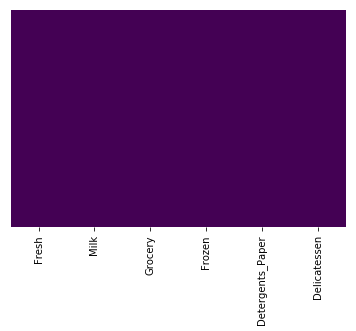

In [37]:
#Visualizing missing values - Doublecheck if you have any missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [39]:
#verify data type for the variables
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [40]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


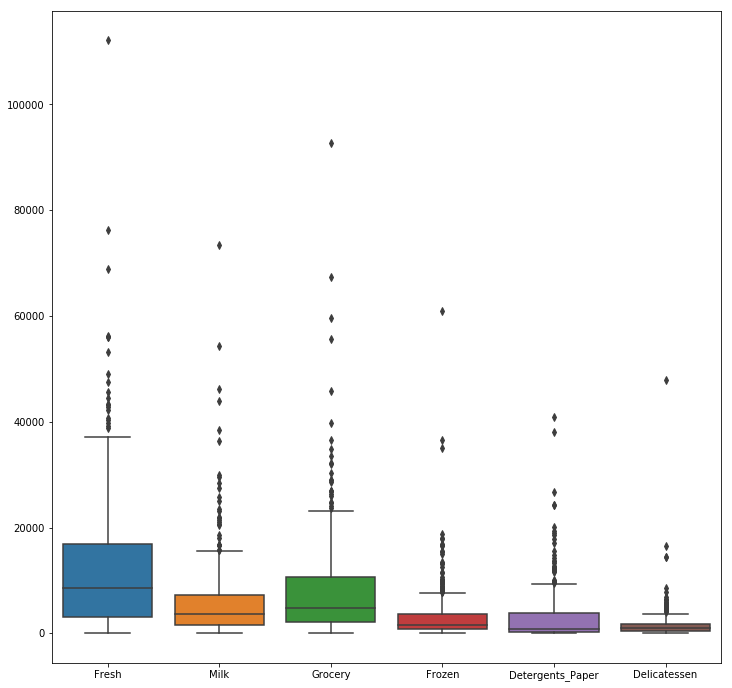

In [41]:
#boxplot to study the distributional characteristics of our dataset.
plt.figure(figsize=(12,12))
#data.boxplot()
sns.boxplot(data=data)

### Implementation: Selecting Samples
**To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.** In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [42]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23,198,367]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,11686,2154,6824,3527,592,697
2,3477,894,534,1457,252,342


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


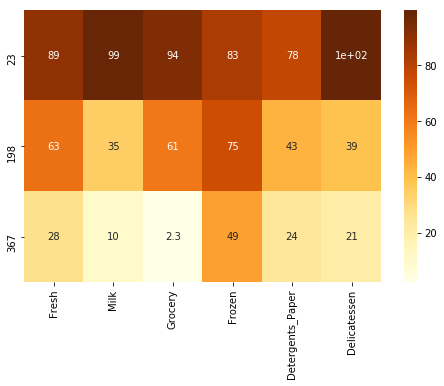

In [43]:
#Percentile heatmap for sample points

import seaborn as sns
plt.figure(figsize=(8,5))

indices = [23,198,367]

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples,
            yticklabels=True,
            annot=True,
            cbar=True,
            cmap='YlOrBr')

In [44]:
#compute mean values
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [45]:
data.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

**Answer:**
- Sample#1/Row 0: Purchases for all features(products)are above 3rd quartile(75%). This could be a wholesaler who sells a huge amount of goods to small-scale businesses.

- Sample#2/Row 1: All purchases are between 1st and 3rd quartiles. This could be a regular retail store - A good example is a grocery store in a busy neighborhood.

- Sample#3/Row 2: Most purchases are below lower quartile(25%) except Fresh category which falls between the lower and the 2nd quartile. This could be a small scale store that sells items in small quantities. A good example would be a  convenience store.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [46]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to 
#drop the given feature

X = data.drop('Detergents_Paper', axis=1)
y = data['Detergents_Paper']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=101)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor(random_state=101)
dtree_regressor.fit(X_train,y_train)
    
                    
# TODO: Report the score of the prediction using the testing set
score = dtree_regressor.score(X_test, y_test)
print('dtree_regressor score is: ', score)
 


dtree_regressor score is:  0.6895522615942111


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
>Which feature did you attempt to predict?

- Detergents_Paper

>What was the reported prediction score?

- 0.69

>Is this feature necessary for identifying customers' spending habits?

- R^2 score for the Detergents_Paper prediction using other features is 0.69. This is a  significant score and also means that Detergents_Paper data points can be predicted using the other features. As a result,the Detergents_Paper variable can be dropped.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

###### Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.

###### How is the data for those features distributed?

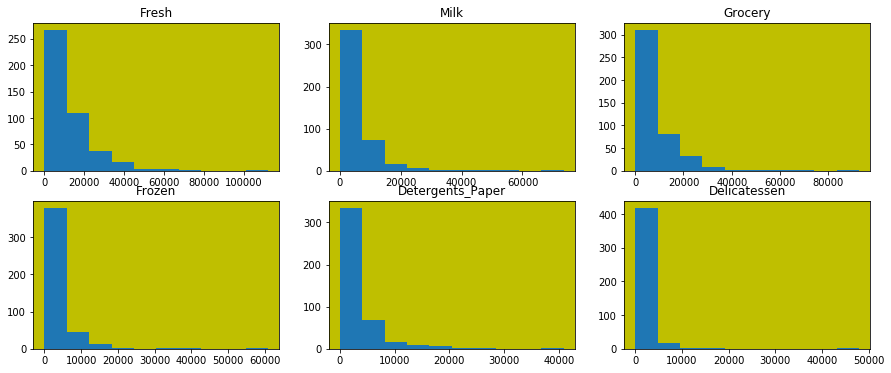

In [48]:
#ref:[15],[16]

#graph distribution(separate) for all features
# distribution of each feature in the dataset

my_list = data.columns
plt.figure(figsize=(15,6))
for c, colmn in enumerate(my_list):
    plt.subplot(2,3,c+1,facecolor='y')
    plt.hist(data[colmn])
    plt.title(colmn)

**Answer:**
- According to the plots above, the distributions for all features are positively skewed (mass of the distribution is concentrated on the right). In other words, the underlying distribution of the dataset is NON-NORMAL


###### Are there any pairs of features which exhibit some degree of correlation?

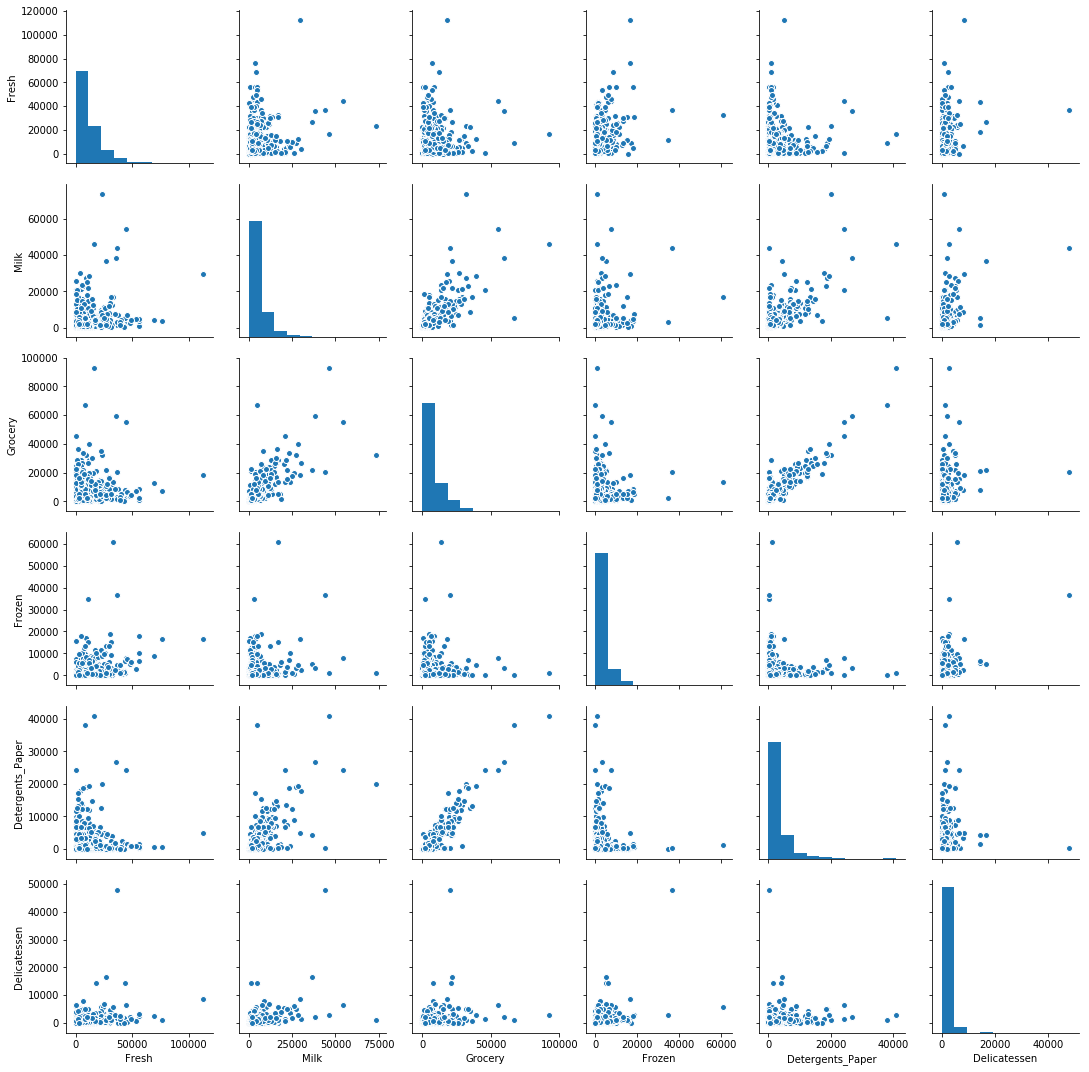

In [49]:
sns.pairplot(data,palette='coolwarm')

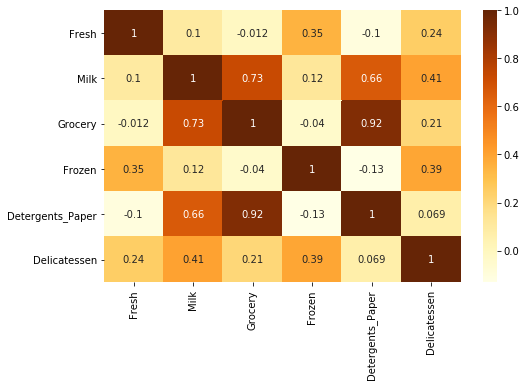

In [50]:
#Ref:[4],[5]

#compute correlation between features
corrln = data.corr()

#use seaborn to print correlation
plt.figure(figsize=(8,5))

sns.heatmap(corrln,
            yticklabels=True,
            cbar=True,
            annot=True,
            cmap='YlOrBr')

**Answer:**
As per the scatterplot and the heatmap plots above, 

- Detergent_Paper and Grocery have a positive correlation and a high   correlation value of 0.92.This means that higher values on one variable are associated with higher values of the other variable i.e., both rise together.

- Milk and Grocery have a moderate positive correlation with a value of 0.73.
   
- Detergent_Paper and Milk have a moderate positive correlation with a value of 0.66.

###### Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?

**Answer:**
- Yes. I attempted to predict Detergents_Paper.
The R^2 score for Detergents_Paper prediction using other features is 0.69. This means that Detergents_Paper data points can be predcited using other features. *(A variable  that can be predicted from other features doesnt give any additional information and hence this variable should be dropped).*
    

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [51]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)


In [52]:
#Scatterplot using SEABORN
#sns.pairplot(log_data,palette='coolwarm')#works too!

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [ ]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, 
                  alpha = 0.3, 
                  figsize = (14,10), 
                  diagonal = 'kde');

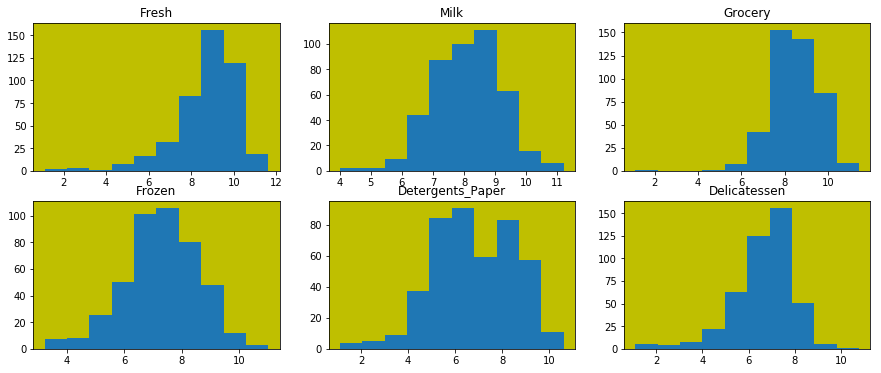

In [54]:
#ref:[15],[16]
#graph distribution(separate) for all features
# distribution of each feature in the dataset after FEATURE SCALING

my_list = log_data.columns
plt.figure(figsize=(15,6))
for k, colmn in enumerate(my_list):
    plt.subplot(2,3,k+1,facecolor='y')
    plt.hist(log_data[colmn])
    plt.title(colmn)

**Answer:**
- The above plots show that the log_data features have normal distribution compared to the original dataset.

- Detergent_Paper and Grocery still have a significant positive correlation.

- Milk and Grocery have a stronger  correlation.

- Detergent_Paper and Milk  have a stronger  correlation.


In [55]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
2,8.153925,6.795706,6.280396,7.284135,5.529429,5.834811


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [56]:
#ref:[17]
###########################################################
#STEP I
###########################################################
#Set empty list to hold outliers for STEP II here below
outliersList = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5 
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

###########################################################
#STEP II 
###########################################################    
    # OPTIONAL: Select the indices for data points you wish to remove
    # Updated code to remove outlier from all the features
    outliers  = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliersList += outliers
###########################################################
#STEP III 
###########################################################
# REMOVE THE OUTLIERS, if any were specified
good_data = log_data.drop(log_data.index[outliersList]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [57]:
print ('{} outliers have been removed.'.format(len(outliersList)))

48 outliers have been removed.


In [58]:
print ('Outliers removed{}.'.format(outliersList))

Outliers removed[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343].


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [59]:
#ref:[1]
###########################################################
#STEP I
###########################################################

#note: NEED TO USE log_data NOT good_data IN ORDER TO CREATE 
#ALIST OF DUPLICATE OUTLIER.tHE OUTPUT HERE IS USED IN STEP II BELOW

#create an empty  list 
OutliersForMoreThan1Feature = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the 
    #given feature.
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the 
    #given feature.
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an 
    #outlier step (1.5 times the interquartile range).
    step = 1.5 * (Q3 - Q1) 
    
    #append row to the dataframe
    OutliersForMoreThan1Feature.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())
    
    # Find outliers that occur in more than 1 feature
    
###########################################################
#STEP II 
###########################################################
#create an empty  list 
OutlierDuplicates=[]
for q in OutliersForMoreThan1Feature:
    for y in q:
        if y in OutlierDuplicates:
            continue
        else:
            if sum(t.count(y) for t in OutliersForMoreThan1Feature) > 1:
                OutlierDuplicates.append(y)
OutlierDuplicates

[65, 66, 128, 154, 75]


###### Are there any data points considered outliers for more than one feature based on the definition above?

**Answer:**
- yes.65, 66,75, 128, and 154

###### Should these data points be removed from the dataset?

**Answer:**
- Yes.These data points should be removed from the dataset inorder to prevent strong-influence on machine learning model and ultimately affect model's peformance.

###### If any data points were added to the outliers list to be removed, explain why.

**Answer:**
- As stated above outliers can affect the performance of ML algorithm. For example, K-means algorithnm works by updating the cluster center after computing the average for all the data points that are close to each other. This would only make sense or rather work if all data points are perfectly clustered together. Any outliers will have a significant effect(negative effect) on K-means average computation.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

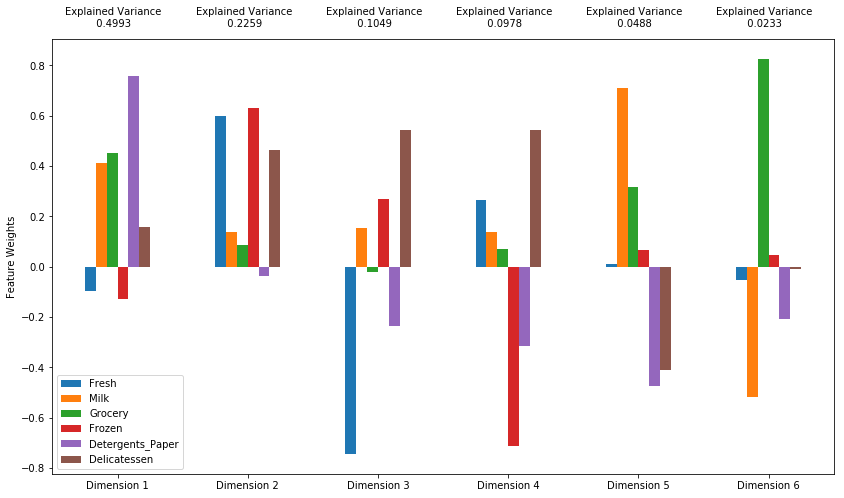

In [65]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=101)#Note:"n_components" must be between 0 and "n_features"
                                           #"n_features" for this project is equal to 6 since we have 6 features.

#fit data
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [66]:
##Compute values for CUMULATIVE explained variance
print(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


In [39]:
#Table - Correlations between the principal components 
#and the original variables 
#Transpose to have components as columns.
pca_resultsTable = pca_results.transpose()
pca_resultsTable

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
Explained Variance,0.4993,0.2259,0.1049,0.0978,0.0488,0.0233
Fresh,-0.0976,0.6008,-0.7452,0.2667,0.0114,-0.0543
Milk,0.4109,0.1370,0.1544,0.1375,0.7083,-0.5177
Grocery,0.4511,0.0852,-0.0204,0.0710,0.3168,0.8267
Frozen,-0.1280,0.6300,0.2670,-0.7133,0.0671,0.0471
Detergents_Paper,0.7595,-0.0376,-0.2349,-0.3157,-0.4729,-0.2080
Delicatessen,0.1579,0.4634,0.5422,0.5445,-0.4120,-0.0094


In [40]:
#explained 'Explained Variance' by each Dimension\Component

SummarizedVar = pca_resultsTable.iloc[0]
SummarizedVar

Dimension 1    0.4993
Dimension 2    0.2259
Dimension 3    0.1049
Dimension 4    0.0978
Dimension 5    0.0488
Dimension 6    0.0233
Name: Explained Variance, dtype: float64

In [41]:
#Remove 'Explained Variance' ROW fron trasposed tabbe 
#for eisier interpretation.
pca_resultsTable1 =  pca_resultsTable.drop('Explained Variance', axis=0)
pca_resultsTable1

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
Fresh,-0.0976,0.6008,-0.7452,0.2667,0.0114,-0.0543
Milk,0.4109,0.1370,0.1544,0.1375,0.7083,-0.5177
Grocery,0.4511,0.0852,-0.0204,0.0710,0.3168,0.8267
Frozen,-0.1280,0.6300,0.2670,-0.7133,0.0671,0.0471
Detergents_Paper,0.7595,-0.0376,-0.2349,-0.3157,-0.4729,-0.2080
Delicatessen,0.1579,0.4634,0.5422,0.5445,-0.4120,-0.0094


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

###### How much variance in the data is explained in total by the first and second principal component?

0.7252

- 73% of variance in the data is explained by the first and second principal components.

##### How much variance in the data is explained by the first four principal components

0.9279

- 93% of variance in the data is explained by the first four principal components.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [67]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0921,3.2039,0.9108,1.0586,0.3270,-0.2987
1,-0.4824,0.5965,-0.2455,-0.4550,0.1642,0.6673
2,-2.5226,-1.3239,0.1526,-0.5675,-0.6418,-0.7751


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [68]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state = 101)

#fit
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [69]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0921,3.2039
1,-0.4824,0.5965
2,-2.5226,-1.3239


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, **the biplot shows the projection of the original features along the components.** A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

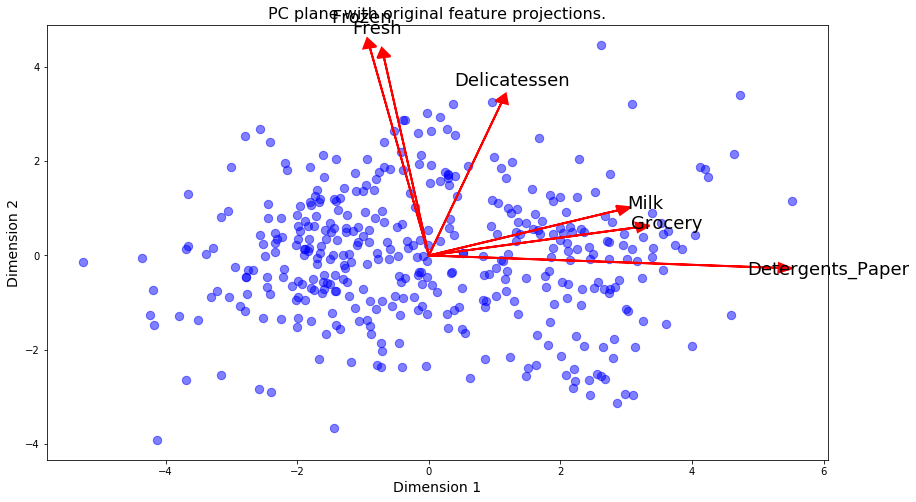

In [70]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

**Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.** 



From the biplot, which of the original features are most strongly correlated with the first component? 
 * Detergents_Paper
 * Grocery
 * Milk
 
What about those that are associated with the second component? 
 * Frozen
 * Fresh
 * Delicatessen

Do these observations agree with the pca_results plot you obtained earlier?
 * Yes

## Clustering

**In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. **

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

###### What are the advantages to using a K-Means clustering algorithm?

**Answer:**

- Easy to implement

- More efficient in large dataset especially when the number of clusters is small.

- Easy to interpret clusters.



###### What are the advantages to using a Gaussian Mixture Model clustering algorithm?

**Answer:**
- Flexible

- Gaussian Mixture Model accommodate "mixed membership" i.e., a data point belongs to each cluster to certaing degree based on probability.

###### Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Answer:**
I'll use K-means.

Why K-means?

 * K-Means training is much faster compared to Gaussian Mixture Mode(GMM)
 * According to Percentile heatmap for sample points plot above, clusters for our dataset seem to be well defined and therefore I'll use K-Means instead of GMM. GMM is based off of probability and hence there is a chance that "mixed-membership" will occur when we fit GMM model. This will ultimately affect  GMM predictions.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [71]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans 
clusterer = KMeans(random_state = 101)

#fit
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)

print('The mean silhouette coefficient score is: ', score)

The mean silhouette coefficient score is:  0.37722920439053564


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

In [72]:
#[A]find the best n_clusters
SilhouetteScore=[]

for x in range(2,10):
    clusterer = KMeans(n_clusters=x,random_state = 101).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    SilhouetteScore.append(silhouette_score(reduced_data, preds))
    
SilhouetteScore

[0.44715774229346705,
 0.363986479840174,
 0.3311509542845657,
 0.35079453877321376,
 0.3636499317128345,
 0.35612490807397673,
 0.37722920439053564,
 0.34186030790229494]

###### find the best n_clusters=x using  silhouette coefficient
- n_clusters=2 has the best silhouette score of 0.45.

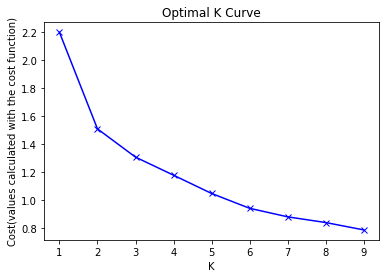

In [73]:
#Ref:https://pythonprogramminglanguage.com/kmeans-elbow-method/
#B]find the best n_clusters
# Determine k(clusters)

from scipy.spatial.distance import cdist

cost1 = []
X = reduced_data
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    cost1.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
#plt.figure(figsize=(5,5))
plt.plot(K, cost1, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost(values calculated with the cost function)')
plt.title('Optimal K Curve')
plt.show()




###### find the best n_clusters=x using elbow method
- "When K increases, the centroids are closer to the clusters centroids.The improvements will decline, at some point rapidly, creating the elbow shape.That point is the optimal value for K. In the image above, K=2[10]."

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

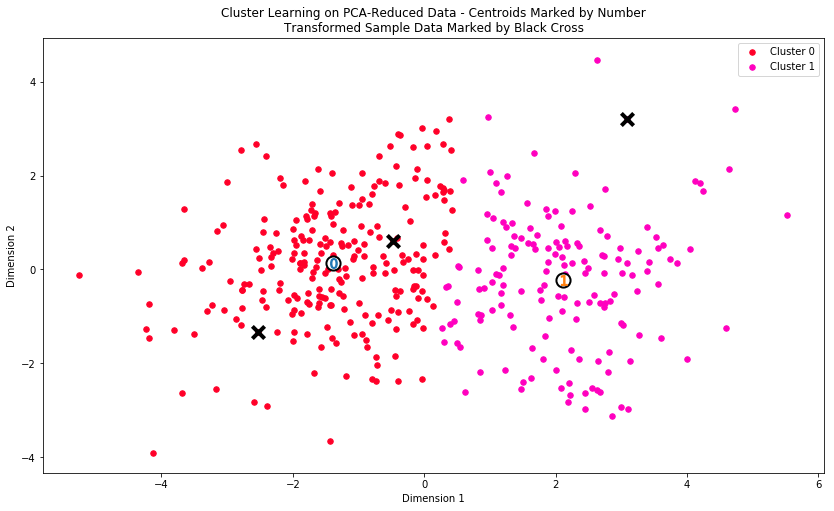

In [74]:
#Implement Kmeans again using the OPTIMAL number of CLUSTERS(2 clusters in this case)

from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, random_state=0)#using 2 clusters

#fit
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster covariances
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [75]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [76]:
#Recall
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
- Segment 0 represents an establishment with order amount below average for all categories. A good example here is a small retail store.

- Segment 1 represents an establishment with order amount above average for all categories  except Fresh and Delicatessen . A good example here is a wholesale store.
    

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [77]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [78]:
#Sample that were selected and explore them in more detail at the beginning 
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,11686,2154,6824,3527,592,697
2,3477,894,534,1457,252,342


In [79]:
#the averages of all the data points predicted in the respective clusters
#See "Implementation: Data Recovery" section above.
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


**Answer:**
>Sample point 0 is best represented by Segment 1.
- Sample 0 was initially thought to be a wholesaler who sells a huge amount of goods because all data points for features were greater than 3rd quartile. This is consistent with the predictions(Segment 1) i.e.,Milk, Grocery,Detergent_papers, and Delicatessen values for segment 1 are also above 3rd quartile.Fresh and Frozen  values are between 1st and 3rd quartile. Therefore,Segment 1 values are indicative of a wholesaler who sells a significant amout of goods across all products/features.

>Sample point 1 is best represented by Segment 0.
- Sample 1 was initially thought to be a neighborhood retail store because
all data points for features were between 1st and 3rd quartile. This is consistent with the predictions(Segment 0). All Segment 0 feature values fall between 1st and 3rd quartile except Grocery and Frozen numbers that are above 3rd quartile. Segment 0 feature values are indicative of a BUSY retail store that sells more Grocery and Frozen and a fair amount of other goods.

>Sample point 2 is best represented by Segment 0.
- Sample 2 was initially thought to be a small scale store/convenience store because most purchases are below lower quartile(25%) except Fresh category which falls between lower and 2nd quartile. This is NOT consistent with the predictions(Segment 0 ). All Segment 0 feature values fall between 1st and 3rd quartile except Grocery and Frozen numbers that are above 3rd quartile. This could mean that Segment 0 cluster is "large" and hence Sample 2 was misclassified under Segment 0. Another cause of misclassification would be the fact that we only used 2 cluster - a higher cluster algorithm can be considered to resolve this. 




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**


 I think this would be a perfect problem for A/B tests application.
•	The wholesaler will need to create a sample population by selecting(randomly) customers from the entire population. The sample population needs to be composed of a statistically significant number of participants.

•	The wholesaler will then divide the sample population into 

	       . [a]Control group and 
	       . [b]Alternative treatment group.

•	The control group will continue to receive deliveries 5 days a week (just like all other customers that are not included in the experiment) whereas the Alternative treatment group will start receiving deliveries 3 days a week.

•	The wholesaler will then track a metric (for example retention metric or "happy" customer metric, or customer-reaction metric).

•	Data collected by tracking the metric from both groups will then be analyzed to determine if the metric-statistic for both groups is statistically different.

According to K-means clustering results (Segment 1 and Segment 0), there is a high chance that the effects of this change will affect each cluster in different ways. I think customers who belong to Segment/cluster 1 will MOST LIKELY be affected by changing delivery from 5 days a week to 3 days a week. It is therefore of significant importance NOT to assume the change affects all customers EQUALLY. We need to conduct 2 separate experiments i.e., Segment 1 population should be treated as a separate population that has different characteristics from those of Segment 0 population. Note: The Experiment for each segment needs to follow the above A/B process in order to arrive at statistically significant results. Experiments’ Result will help in evaluating and comparing the impact of the delivery frequency changes on both segments.


#ref:[14]


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesaler needs to use a two-class classification algorithm based off of the following:
 * There are two possible classes that customers can be assigned to. These classes are segment "0" and  segment"1".
 * The structure of the data is known.

The target variable variables for the classification algorithm are segment "0" and segment "1".



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

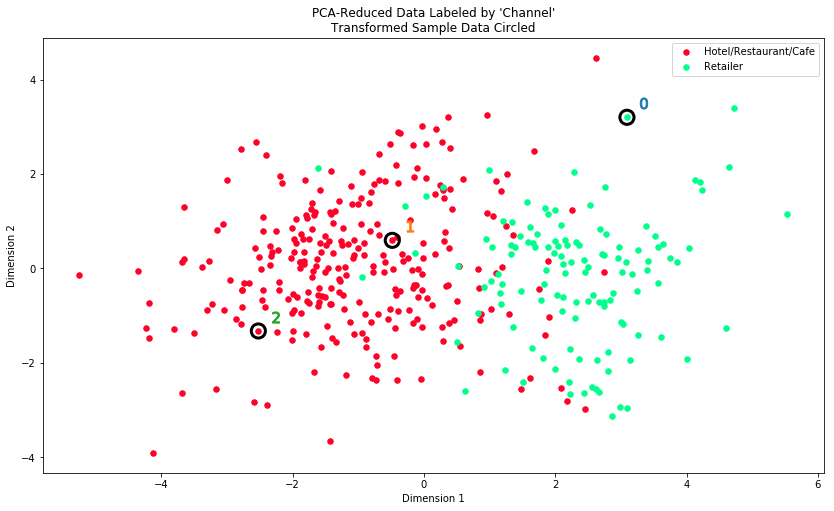

In [80]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliersList, pca_samples)

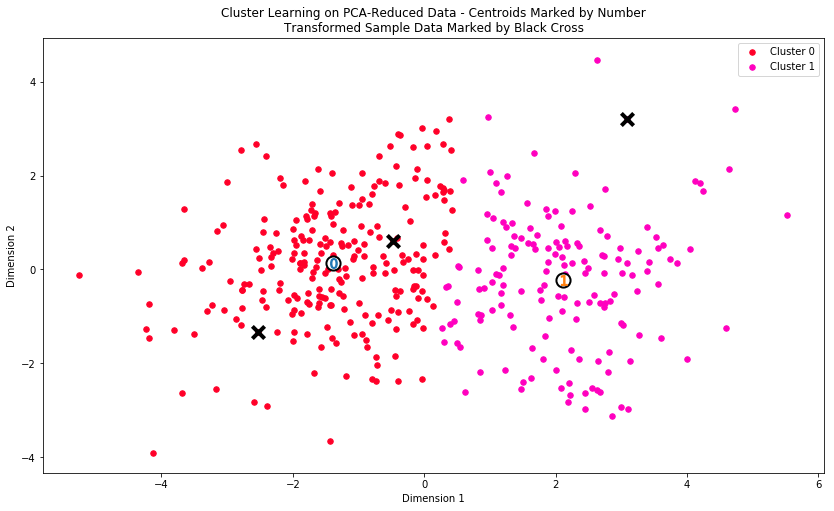

In [81]:
# Recall from Cluster Visualization section- 
#Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

###### How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?

**Answer:**
The Clustering using K-means above(with 2 clusters) is consistent with the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers.

###### Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?

**Answer:**
Yes. Number 1 and 2 will be classified as purely Hotel/Restaurant/Cafe and Retailer respectively.


###### Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
Yes. Customer segments are consistent with previous segments in K-means implemetation section above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [82]:
#References:

#[1]https://github.com
#[2]https://classroom.udacity.com - MLND
#[3]http://thepythonguru.com/python-functions/
#[4]https://seaborn.pydata.org/generated/seaborn.heatmap.html
#[5]https://seaborn.pydata.org/examples/heatmap_annotation.html
#[6]https://github.com/chelmyers/data-analysis-python#descriptive
#[7]https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
#[8]http://book.pythontips.com/en/latest/enumerate.html
#[9]Lean Six Sigma Pocket Toolbook,M.George,D.Rowlands,M.Prince,& J.Maxey
#[10]https://pythonprogramminglanguage.com/kmeans-elbow-method/
#[11]http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/
#[12]https://onlinecourses.science.psu.edu/stat505/node/54/
#[13]http://setosa.io/ev/principal-component-analysis/
#[14]https://medium.com/netflix-techblog/its-all-a-bout-testing-the-netflix-experimentation-platform-4e1ca458c15
#[15]https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
#[16]http://book.pythontips.com/en/latest/enumerate.html
#[17]Produce a scatter matrix for each pair of newly-transformed features
